In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset

import time
import random
import sys,os
from tqdm import tqdm


In [2]:
from pydisc.loader import vanler_data
from pydisc.loader import get_loader,get_train,Simulation
from pydisc.model import AlphaNet
from pydisc.helper import predict_one,predict_series,plot_compare

from pydisc.trainer import Trainer


In [3]:
sim_dat = vanler_data
tata = Trainer(sim_dat)

100%|██████████| 40/40 [00:14<00:00,  2.81it/s]


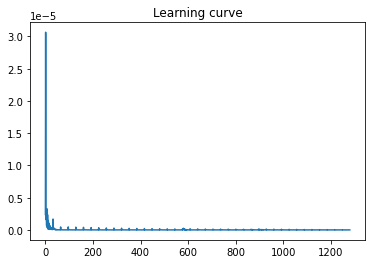

In [4]:
tata.fit()

Average Error is 5.002e-05


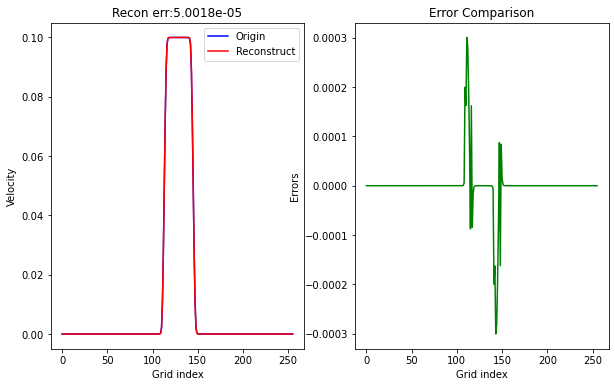

0

In [5]:
tata.jplot(130)

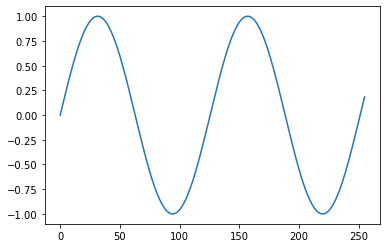

In [6]:
_,_,nx = vanler_data.shape
xin = torch.sin(torch.arange(nx)/20)
plt.plot(xin)

In [7]:
tata.net(xin.reshape(1,1,-1))

tensor([[ 0.0504, -0.4967,  0.3313,  0.1298, -0.0149]], grad_fn=<CatBackward0>)

In [ ]:
tata.net(xin.reshape(1,1,-1))

tensor([[ 0.0479, -0.5068,  0.3728,  0.1172, -0.0312]], grad_fn=<CatBackward0>)

In [8]:
xout = tata.time_stepping(500,xin)
xrep = xin*torch.ones_like(xout)
iject = tata.iplot(xrep,xout)



In [28]:
from ipywidgets import interact

def f(i):
    plt.plot(xin,'b--')
    plt.plot(xout[i],'r')

interact(f,i=len(xin)//2)

interactive(children=(IntSlider(value=128, description='i', max=384, min=-128), Output()), _dom_classes=('widg…

<function __main__.f(i)>

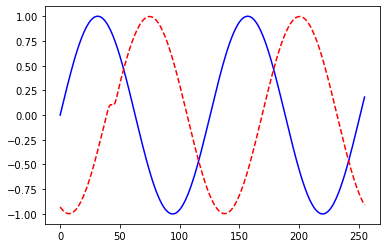

In [30]:
f(90)

In [ ]:
tata.test_eval()

100%|██████████| 40/40 [00:01<00:00, 28.89it/s]


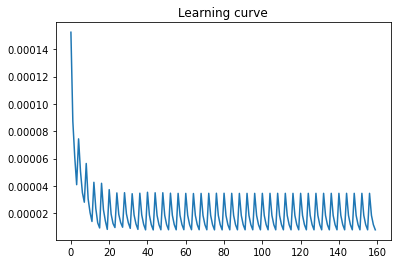

Average Error is 4.479e-03


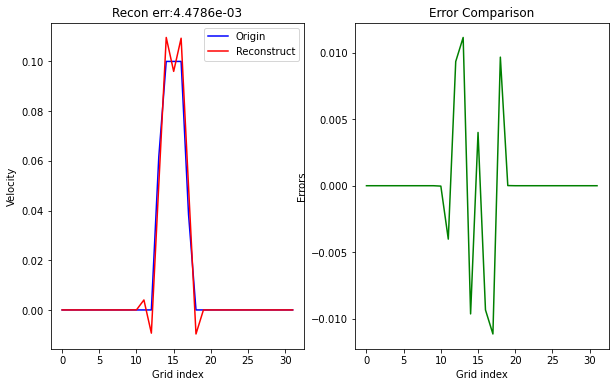

0

In [6]:
sim_dat = vanler_data[::8,:,::8]
tata = Trainer(sim_dat)
tata.fit()

tata.jplot(13)

100%|██████████| 40/40 [00:01<00:00, 22.17it/s]


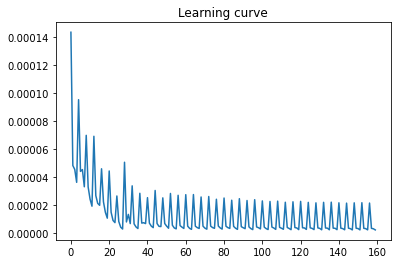

Average Error is 4.088e-03


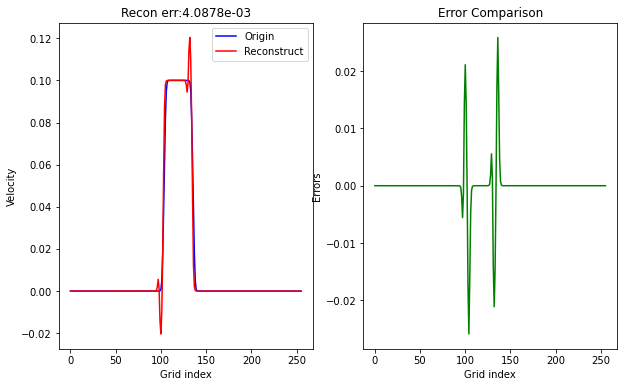

0

In [7]:
sim_dat = vanler_data[::8,:]
tata = Trainer(sim_dat)
tata.fit()

tata.jplot(13)